## Association Rule Learning Homework

*Prepared by:*
**Jude Michael Teves**  
Faculty, Software Technology Department  
College of Computer Studies - De La Salle University

---

Submitted by:
- Guerra, Jose Maria Angelo
- Hinolan, Charles Joseph
- Lasala, Kyle Carlo
- Lorenzo, Antonio Jose Maria
- Roco, Katrina Bianca

## Requirements

Answer the following questions:

**Groceries Dataset**  
1. Calculate the association rules and find the `significant/interesting` items in this dataset. Feel free to use any threshold value. (10 pts)
    - group the items by member
    - group the items by month
2. What would you recommend to the owner of a grocery store given these association rules? (15 pts)
3. Is there any other grouping that could give us high confidence/interest? (10 pts)

**Another Dataset**  
1. Find another dataset that can be turned into an association rule learning problem. Ideally, more than 1000 transactions/records. This does not have to be grocery-related. (20 pts)
2. Similar to the grocery dataset, calculate the association rules and find the `significant/interesting` items. (10 pts)
3. What would you recommend given the association rules? (25 pts)
4. Any other learning?

Note:
 - You have to create a writeup on the code you've written. Make sure that the code is clean as well. (5 pts)
 - Cite references if there are any. If you will be using the code I've given, cite it. If you got help from your peers, cite it as well. (5 pts)
 - Submit the link for your copy of this Google Colaboratory notebook. **Make sure it's public**. You may use incognito to see if the link is accessible.

<hr>

## Grading Criteria

|Criteria|Points|
|---|---|
|Groceries Dataset Analysis|35|
|Another Dataset Analysis|55|
|Code Cleanliness|5|
|References|5|


## Preliminaries

### Import libraries

We will be using the `PyFIM` library to do association rule learning in this homework. If this is not already installed in your environment, you may use the either of the following commands in your command line:

```conda install -c conda-forge pyfim``` or
```pip install pyfim```

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fim import arules, apriori, fpgrowth

### Prepare the dataset

We will be utilizing the <a href="https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset">Groceries dataset</a> from Kaggle.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/Cyntwikip/data-repository/main/groceries.csv')
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


## Data Preprocessing and Cleaning

Before exploring and analyzing the dataset, data cleaning and preprocessing techniques shall first be performed to address inconsistencies within the dataset that could result in any erroneous data analysis.

### Check for Incorrect Datatypes

In [4]:
# checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [5]:
# convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


### Check for Default Values

In [6]:
# checking items
unique_items = df['itemDescription'].unique()
print("Number of Unique Items:", len(unique_items))
print(sorted(unique_items))

Number of Unique Items: 167
['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese ', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegeta

## Grouping Items by Member

To calculate the associaton rules and find the significant/interesting items in the dataset according to `Member_number` and `Date`

In [7]:
df_grouped = df.groupby(['Member_number','Date']).agg(list)
df_grouped.sort_values(['Member_number', 'Date'], inplace=True)
df_grouped

KeyboardInterrupt: 

In [ ]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['beef', 'white bread'],
 ['frankfurter', 'curd'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['dish cleaner', 'cling film/bags'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'shopping bags'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

### Frequent Itemset Mining

In [ ]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

#### Checking for Ideal Support Threshold

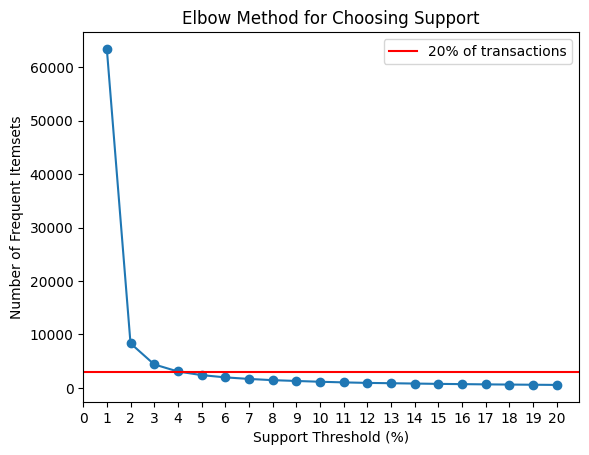

In [ ]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Zoom in the Plot

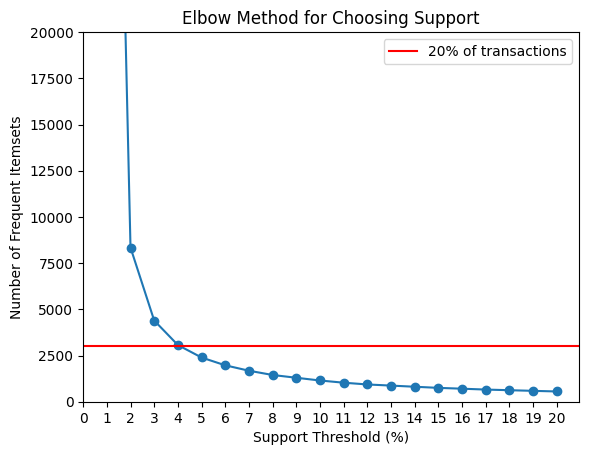

In [ ]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

The Support Threshold is obtained through the **elbow method** (inspired from K-Means Clustering) to generate *enough* rules and avoid *noise*. <br/>
Ideally, we want to be approximately equal to 20% of the transactions (represented by the redline) and not very steep nor flat at the given point so that we avoid the exteremely rare and extremely common itemsets. <br/> Hence, the
***Support Threshold is set to 4.***

#### Get the Frequent Itemsets given that Support Threshold is set to 4

In [ ]:
get_fim(-4, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2363,0.157923
2,"(other vegetables,)",1827,0.122101
6,"(rolls/buns,)",1646,0.110005
13,"(soda,)",1453,0.097106
24,"(yogurt,)",1285,0.085879
...,...,...,...
1635,"(meat, waffles)",4,0.000267
250,"(shopping bags, pip fruit, rolls/buns)",4,0.000267
602,"(butter, pastry, other vegetables)",4,0.000267
1280,"(salty snack, yogurt, whole milk)",4,0.000267


### Significant Itemsets

In [ ]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    result = arules(transactions, supp=supp, conf=conf, report='bxC')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence_pct']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

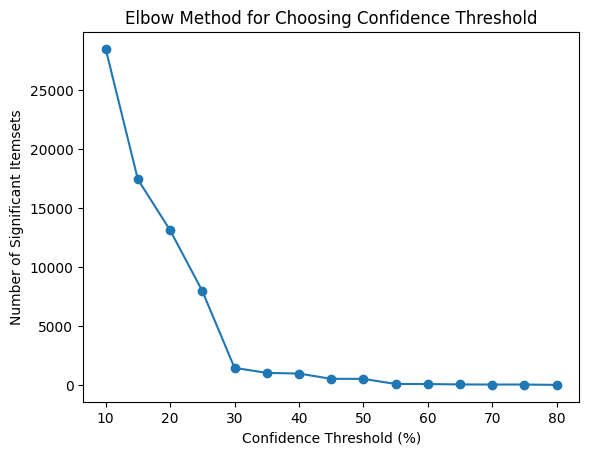

In [ ]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-4, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [ ]:
df_result = get_sig(-4, 30, transactions)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence_pct
1418,whole milk,"(brandy,)",38,0.002540,34.210526
230,whole milk,"(pork, sausage)",23,0.001537,39.130435
348,whole milk,"(beef, whipped/sour cream)",21,0.001403,33.333333
249,other vegetables,"(pork, citrus fruit)",20,0.001337,35.000000
255,yogurt,"(pork, citrus fruit)",20,0.001337,30.000000
...,...,...,...,...,...
730,root vegetables,"(meat, onions)",4,0.000267,50.000000
731,whole milk,"(meat, waffles)",4,0.000267,50.000000
733,beverages,"(meat, frozen vegetables)",4,0.000267,50.000000
734,tropical fruit,"(specialty chocolate, citrus fruit, whole milk)",4,0.000267,50.000000


### Interesting Itemsets

In [ ]:
df_result['interest'] = df_result['confidence_pct']/100 - (df_result['support_relative'])
    

df_result = df_result.sort_values('interest', ascending=False)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence_pct,interest
1402,whole milk,"(house keeping products, other vegetables)",4,0.000267,100.000000,0.999733
41,whole milk,"(pastry, soda, other vegetables)",6,0.000401,83.333333,0.832932
1102,rolls/buns,"(semi-finished bread, fruit/vegetable juice)",5,0.000334,80.000000,0.799666
1030,whole milk,"(processed cheese, pastry)",5,0.000334,80.000000,0.799666
17,sausage,"(tropical fruit, yogurt, rolls/buns)",5,0.000334,80.000000,0.799666
...,...,...,...,...,...,...
857,pastry,"(ice cream, bottled beer)",10,0.000668,30.000000,0.299332
798,frankfurter,"(misc. beverages, pastry)",10,0.000668,30.000000,0.299332
540,onions,"(root vegetables, yogurt, whole milk)",10,0.000668,30.000000,0.299332
705,other vegetables,"(beverages, curd)",10,0.000668,30.000000,0.299332


### Set Threshold for Interest

In [ ]:
df_result['interest'].mean()

0.425169065189947

(array([429.,  20., 429.,  45.,  13., 433.,   0.,   8.,  33.,   0.,   7.,
          0.,  34.,   0.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([0.29866337, 0.33371683, 0.3687703 , 0.40382377, 0.43887723,
        0.4739307 , 0.50898416, 0.54403763, 0.57909109, 0.61414456,
        0.64919802, 0.68425149, 0.71930495, 0.75435842, 0.78941188,
        0.82446535, 0.85951881, 0.89457228, 0.92962574, 0.96467921,
        0.99973267]),
 <BarContainer object of 20 artists>)

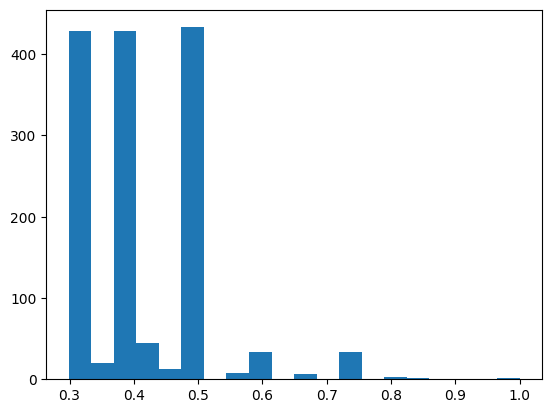

In [ ]:
# Create visualization of the interest measure in a bell curve
plt.hist(df_result['interest'], bins=20)

In [ ]:
threshold = 0.5
df_interesting = df_result[df_result['interest'] > threshold]
df_interesting

,consequent,antecedent,support_absolute,support_relative,confidence_pct,interest
1402,whole milk,"(house keeping products, other vegetables)",4,0.000267,100.000000,0.999733
41,whole milk,"(pastry, soda, other vegetables)",6,0.000401,83.333333,0.832932
1102,rolls/buns,"(semi-finished bread, fruit/vegetable juice)",5,0.000334,80.000000,0.799666
1030,whole milk,"(processed cheese, pastry)",5,0.000334,80.000000,0.799666
17,sausage,"(tropical fruit, yogurt, rolls/buns)",5,0.000334,80.000000,0.799666
...,...,...,...,...,...,...
253,citrus fruit,"(pork, yogurt, other vegetables)",7,0.000468,57.142857,0.570961
252,yogurt,"(pork, citrus fruit, other vegetables)",7,0.000468,57.142857,0.570961
2,whole milk,"(tropical fruit, yogurt, other vegetables)",7,0.000468,57.142857,0.570961
11,whole milk,"(sausage, yogurt, rolls/buns)",9,0.000601,55.555556,0.554954


## Grouping Items by Month

To calculate the associaton rules and find the significant/interesting items in the dataset according to `Month` from `Date`

In [13]:
# Aggregate df groupby Month
df['Month'] = df['Date'].dt.month
df_grouped = df.groupby(['Month', 'Member_number']).agg(list)

df_grouped.sort_values(['Month', 'Member_number'], inplace=True)
df_grouped

Date  \
Month Member_number                                                      
1     1001           [2015-01-20 00:00:00, 2015-01-20 00:00:00, 201...   
      1003                  [2014-01-19 00:00:00, 2014-01-19 00:00:00]   
      1005           [2014-01-23 00:00:00, 2014-01-09 00:00:00, 201...   
      1009                  [2014-01-24 00:00:00, 2014-01-24 00:00:00]   
      1013           [2014-01-17 00:00:00, 2014-01-17 00:00:00, 201...   
...                                                                ...   
12    4988           [2015-12-20 00:00:00, 2014-12-13 00:00:00, 201...   
      4990                  [2015-12-14 00:00:00, 2015-12-14 00:00:00]   
      4991                  [2014-12-22 00:00:00, 2014-12-22 00:00:00]   
      4997           [2015-12-27 00:00:00, 2015-12-27 00:00:00, 201...   
      4999                  [2015-12-26 00:00:00, 2015-12-26 00:00:00]   

                                                       itemDescription  
Month Member_number                                                     
1     1001                     [frankfurter, soda, whipped/sour cream]  
      1003                                 [frozen meals, dental care]  
      1005           [whipped/sour cream, rolls/buns, margarine, ro...  
      1009                                 [canned fish, cocoa drinks]  
      1013                       [hard cheese, napkins, bottled water]  
...                                                                ...  
12    4988           [pork, misc. beverages, long life bakery produ...  
      4990                       [tropical fruit, specialty chocolate]  
      4991                         [other vegetables, root vegetables]  
      4997                  [tropical fruit, white wine, curd, grapes]  
      4999                                      [bottled water, herbs]  

[12852 rows x 2 columns]

In [14]:
# convert to list format
transactions = df_grouped['itemDescription'].to_list()
transactions

[['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen meals', 'dental care'],
 ['whipped/sour cream', 'rolls/buns', 'margarine', 'rolls/buns'],
 ['canned fish', 'cocoa drinks'],
 ['hard cheese', 'napkins', 'bottled water'],
 ['canned beer', 'cookware'],
 ['whipped/sour cream',
  'root vegetables',
  'rolls/buns',
  'packaged fruit/vegetables'],
 ['whipped/sour cream', 'newspapers'],
 ['fruit/vegetable juice', 'vinegar'],
 ['margarine', 'napkins'],
 ['citrus fruit', 'rolls/buns', 'whole milk'],
 ['root vegetables', 'yogurt', 'butter', 'yogurt'],
 ['curd', 'soda'],
 ['specialty bar', 'margarine'],
 ['hamburger meat', 'bottled beer'],
 ['beef', 'root vegetables', 'shopping bags', 'grapes'],
 ['soda', 'fruit/vegetable juice'],
 ['soda', 'domestic eggs', 'sliced cheese', 'soda'],
 ['whole milk', 'sauces'],
 ['rolls/buns', 'candy'],
 ['hamburger meat',
  'tropical fruit',
  'soda',
  'whole milk',
  'long life bakery product',
  'rum'],
 ['pork', 'rolls/buns'],
 ['detergent', 'candy'],
 

### Frequent Itemset Mining

In [15]:
# calculates the frequent itemset using fpgrowth algorithm
def get_fim(supp, transactions):
    result = fpgrowth(transactions, supp=supp, report='as')
    colnames = ['itemset'] + ['support_absolute', 'support_relative']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

#### Checking for Ideal Support Threshold

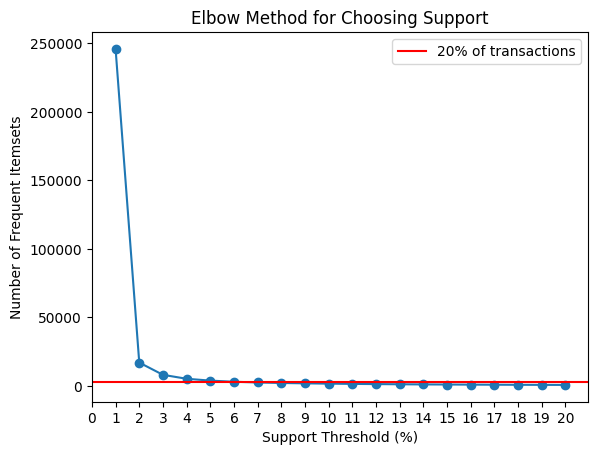

In [16]:
supports = range(1, 21)  # Test supports from 1% to 20%
num_itemsets = []

for supp in supports:
    rules = get_fim(supp*-1, transactions)
    num_itemsets.append(len(rules))

plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Zoom in the Plot

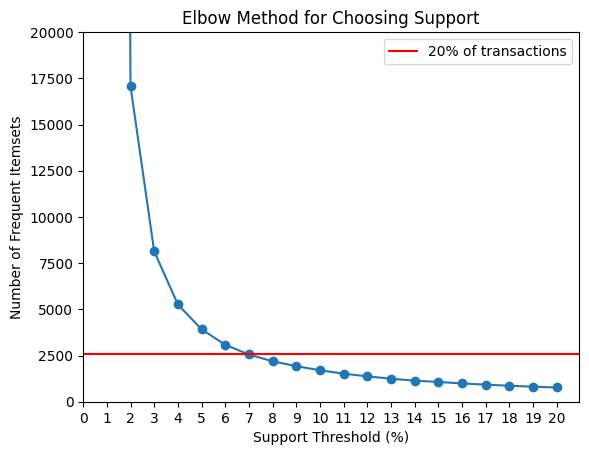

In [17]:
plt.plot(supports, num_itemsets, marker='o')
plt.axhline(y = len(df_grouped)*0.2, color = 'r', label = '20% of transactions')
plt.xticks([x for x in range(21)])
plt.xlabel("Support Threshold (%)")
plt.ylabel("Number of Frequent Itemsets")
plt.ylim([0,20000])
plt.title("Elbow Method for Choosing Support")
plt.legend()
plt.show()

#### Get the Frequent Itemsets given that Support Threshold is set to 7

In [18]:
get_fim(-7, transactions)

,itemset,support_absolute,support_relative
0,"(whole milk,)",2305,0.179350
2,"(other vegetables,)",1789,0.139200
6,"(rolls/buns,)",1615,0.125661
13,"(soda,)",1431,0.111345
24,"(yogurt,)",1269,0.098739
...,...,...,...
678,"(butter, rolls/buns, other vegetables)",7,0.000545
2071,"(soft cheese, yogurt, other vegetables)",7,0.000545
689,"(butter, sausage, soda)",7,0.000545
2064,"(processed cheese, meat)",7,0.000545


### Significant Itemsets

In [19]:
# calculates the frequent itemset using fpgrowth algorithm
def get_sig(supp, conf, transactions):
    result = arules(transactions, supp=supp, conf=conf, report='bxC')
    colnames = ['consequent', 'antecedent'] + ['support_absolute', 'support_relative', 'confidence_pct']
    df_result = pd.DataFrame(result, columns=colnames)
    df_result = df_result.sort_values('support_absolute', ascending=False)
    return df_result

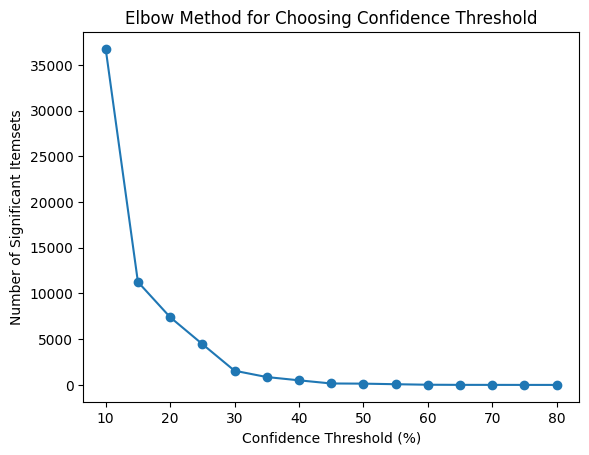

In [20]:
confidence = range(10, 81, 5)  # Test supports from 1% to 20%
num_itemsets = []

for conf in confidence:
    rules = get_sig(-7, conf, transactions)
    num_itemsets.append(len(rules))

plt.plot(confidence, num_itemsets, marker='o')
plt.xlabel("Confidence Threshold (%)")
plt.ylabel("Number of Significant Itemsets")
plt.title("Elbow Method for Choosing Confidence Threshold")
plt.show()

In [21]:
df_result = get_sig(-7, 30, transactions)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence_pct
16,whole milk,"(sausage, yogurt)",105,0.008170,32.380952
68,whole milk,"(pastry, soda)",80,0.006225,31.250000
611,other vegetables,"(coffee, rolls/buns)",52,0.004046,32.692308
677,whole milk,"(chocolate, other vegetables)",44,0.003424,31.818182
266,whole milk,"(whipped/sour cream, citrus fruit)",42,0.003268,30.952381
...,...,...,...,...,...
1328,rolls/buns,"(soft cheese, fruit/vegetable juice)",7,0.000545,57.142857
1327,rolls/buns,"(soft cheese, butter)",7,0.000545,57.142857
586,sausage,"(margarine, yogurt, whole milk)",7,0.000545,57.142857
1325,tropical fruit,"(soft cheese, curd)",7,0.000545,42.857143


#### Interesting Itemsets

In [22]:
df_result['interest'] = df_result['confidence_pct']/100 - (df_result['support_relative'])
    

df_result = df_result.sort_values('interest', ascending=False)
df_result

,consequent,antecedent,support_absolute,support_relative,confidence_pct,interest
69,whole milk,"(pastry, soda, other vegetables)",8,0.000622,75.000000,0.749378
166,yogurt,"(bottled beer, pip fruit, whole milk)",7,0.000545,71.428571,0.713741
629,other vegetables,"(coffee, frankfurter, rolls/buns)",7,0.000545,71.428571,0.713741
1343,other vegetables,"(semi-finished bread, shopping bags)",7,0.000545,71.428571,0.713741
449,whole milk,"(pork, sausage, yogurt)",9,0.000700,66.666667,0.665966
...,...,...,...,...,...,...
1112,other vegetables,"(oil, pork)",20,0.001556,30.000000,0.298444
0,whole milk,"(yogurt, soda, other vegetables)",20,0.001556,30.000000,0.298444
974,other vegetables,"(meat, pip fruit)",20,0.001556,30.000000,0.298444
1041,rolls/buns,"(hard cheese, soda)",20,0.001556,30.000000,0.298444


#### Set Threshold for Interest

In [23]:
df_result['interest'].mean()

0.3760863330635802

(array([355., 331.,  99., 260.,  71., 223.,  68.,   6.,  58.,   0.,   5.,
         11.,  45.,   3.,  12.,   0.,   2.,   0.,   3.,   1.]),
 array([0.29688764, 0.31951214, 0.34213663, 0.36476113, 0.38738562,
        0.41001012, 0.43263461, 0.4552591 , 0.4778836 , 0.50050809,
        0.52313259, 0.54575708, 0.56838157, 0.59100607, 0.61363056,
        0.63625506, 0.65887955, 0.68150405, 0.70412854, 0.72675303,
        0.74937753]),
 <BarContainer object of 20 artists>)

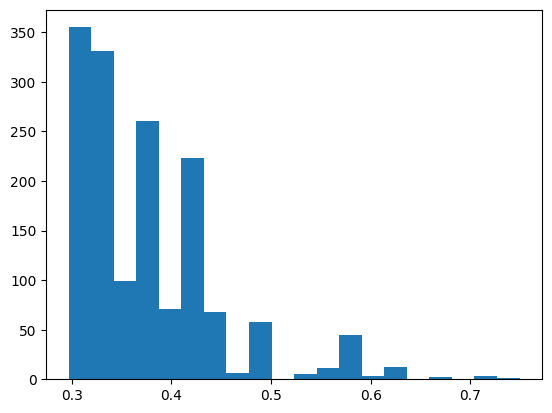

In [24]:
# Create visualization of the interest measure in a bell curve
plt.hist(df_result['interest'], bins=20)

In [25]:
threshold = 0.5
df_interesting = df_result[df_result['interest'] > threshold]
df_interesting

,consequent,antecedent,support_absolute,support_relative,confidence_pct,interest
69,whole milk,"(pastry, soda, other vegetables)",8,0.000622,75.000000,0.749378
166,yogurt,"(bottled beer, pip fruit, whole milk)",7,0.000545,71.428571,0.713741
629,other vegetables,"(coffee, frankfurter, rolls/buns)",7,0.000545,71.428571,0.713741
1343,other vegetables,"(semi-finished bread, shopping bags)",7,0.000545,71.428571,0.713741
449,whole milk,"(pork, sausage, yogurt)",9,0.000700,66.666667,0.665966
...,...,...,...,...,...,...
451,sausage,"(pork, yogurt, whole milk)",11,0.000856,54.545455,0.544599
18,whole milk,"(sausage, yogurt, rolls/buns)",13,0.001012,53.846154,0.537450
208,other vegetables,"(shopping bags, sausage, whole milk)",13,0.001012,53.846154,0.537450
29,whole milk,"(bottled water, soda, other vegetables)",13,0.001012,53.846154,0.537450


## Writeup/Analysis

Refer to the **Requirements section** for the guide questions.

## References

- Teves, J. (n.d.) Association Rule Learning. [Source code]. https://colab.research.google.com/github/Cyntwikip/Data-Mining/blob/main/association_rule_learning/association_rule_learning_homework.ipynb

## End
<sup>made by **Jude Michael Teves**</sup> <br>
<sup>for comments, corrections, suggestions, please email:</sup><sup> <href>judemichaelteves@gmail.com</href> or <href>jude.teves@dlsu.edu.ph</href></sup><br>